<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment 2</b>
    
Thank you for the updates! My new comments have digit 2. 
    
    
I do not have any questions, so I can accept the project now. 
    
    
If you are interested in this topic, please take a look at the small [Time Series Course](https://www.kaggle.com/learn/time-series) on Kaggle. There are just several lessons there, and in the end of this course you will apply your knowledge on the sales dataset that is provided for the ongoing [Store Sales Time Series Forecasting Competition](https://www.kaggle.com/competitions/store-sales-time-series-forecasting) with no rewards except for knowledge :) You can use their dataset for your practice and you can submit your notebook to run the model on the hidden test subset.     
    
 
    
I also recommend the [Prophet](https://facebook.github.io/prophet/docs/quick_start.html) library developed by Meta. It's a really great tool for working with time series. 

    
Another great tool is [Optuna](https://optuna.readthedocs.io), which implements smart tuning using the Bayesian optimization with pruning. Instead of blindly trying all combinations like grid or random search, optuna uses a probabilistic model that learns which parameter values led to good results and predicts which new values are more likely to improve the objective. So it uses a very smart way to explore the hyperparameters space. It estimates which hyperparameter combinations are likely to perform well, then suggests new trials based on this evolving model. During each trial, it evaluates performance and optionally prunes underperforming runs quite early to focus computation on the most promising areas of the search space. However, I am not sure whether you will be able to install optuna here, so you probably need to test it in your local environment using some IDE. You can refer to this pretty good [notebook](https://www.kaggle.com/code/vipin20/arima-sarimax-exponential-smoothing-using-optuna).

    
Congratulations and good luck! 
    
</div>

<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
    
Hi Michael, my name is Svetlana (my handle on Discord is `svetatripleten`). I apologize for a long review. We had technical issues, and I hope it did not cause too much inconvenience to you 🙏


Congratulations on submitting Time Series project! 🎉 Here I will be using the standard color marking:
    

   
    
<div style="border: 5px solid green; padding: 15px; margin: 5px">

Great solutions and ideas that can and should be used in the future are in green comments. Some of them are: 
    
    
- You have successfully prepared the subsets. It is important to split the data correctly in order to ensure there's no intersection;    
    
    
    
- It's great that you used `statsmodels` to analyze time series as it provides comprehensive summaries that can be useful when we need to make data-driven decisions;



- Trained and compared several models. It is not enough to just train a model. We also need to analyze the results and compare different models. Very good! 

    
- Tuned hyperparameters. We tune them to identify the best model that will yield the desired metric value;


- Wrote an excellent conclusion! A well-written conclusion shows how the project met its objectives and provides a concise and understandable summary for those who may not have been involved in the details of the project. Good job! 

</div>
    
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project. I've left several recommendations throughout the project. 
    
</div>
<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. Please note that the project cannot be accepted until these issues are resolved. More specifically:
    
    
    
- Please add more conclusions about the charts. Is there any trend or seasonality in the data? 
  
    
    
- Please use the `TimeSeriesSplit` class. Unlike standard k-fold cross-validation, which randomly splits data into folds, TimeSeriesSplit ensures that the training set always contains data that precedes the validation set.     
      
       
</div>         
<hr>
    
<font color='dodgerblue'>**To sum up:**</font> thank you very much for submitting the project! You did a fantastic job here. You have successfully trained several models and analyzed time series, which is great! The project is well-structured and meets the objective: a forecasting model with RMSE < 48 was successfully built and tested. The results are represented and interpreted effectively. However, there're a couple of issues that need your attention. Would you take a look at my comments?
    

<hr>
    
Please use some color other than those listed to highlight answers to my comments.
I would also ask you **not to change, move or delete my comments** to make it easier for me to navigate during the next review.



<hr> 
    
✍️ Some notes: 


- Here's a [link](https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/) to the article about the autoregression models that you may find interesting. 
    
    
- [Here](https://medium.com/@soumyachess1496/cross-validation-in-time-series-566ae4981ce4) you can read about cross-validation with time series.
    

- Consider using advanced tools such as [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html) and [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). `ColumnTransformer` and `Pipeline` are essential tools that help us create robust, maintainable, and efficient machine learning workflows. They work with data much more effectively. You can handle different data types and it is much easier to avoid data leakage. The code organization is very clean, but it may seem a bit difficult at the beginning. Take a look at this page to learn how to [organize a pipeline with ColumnTransformer](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html).  
<hr>
    
📌 Please feel free to schedule a 1:1 sessions with our tutors or TAs Feel free to book 1-1 session [here](https://calendly.com/tripleten-ds-experts-team), join daily coworking sessions, or ask questions in the sprint channels on Discord if you need assistance 😉 
</div>

# Project description

Sweet Lift Taxi company has collected historical data on taxi orders at airports. To attract more drivers during peak hours, we need to predict the amount of taxi orders for the next hour. Build a model for such a prediction.

The RMSE metric on the test set should not be more than 48.

## Project instructions

1. Download the data and resample it by one hour.
2. Analyze the data.
3. Train different models with different hyperparameters. The test sample should be 10% of the initial dataset. 
4. Test the data using the test sample and provide a conclusion.

## Data description

The data is stored in file `taxi.csv`. The number of orders is in the '*num_orders*' column.

## Preparation

In [1]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


import holidays
from datetime import date

from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

from pmdarima import auto_arima


In [2]:
# Standardized plotting of a barplot and histogram

def plot_hist_bar(df, title, col):
    print()
    print(title)
    
    # Plot histograms of the columns
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    sns.histplot(data=df, x=col, bins=30, ax=axes[0], kde=True)
    axes[0].set_title(title)
    
    sns.boxplot(data=df, x=col, ax=axes[1])
    axes[1].set_title(title)
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Download the data

In [3]:
# download data

df = pd.read_csv('/datasets/taxi.csv', parse_dates=['datetime'])

In [4]:
# perform basic exploration

def explore_df(df):
    print()
    print(df.head(5))
    print()
    print(df.info())
    print()
    print(df.describe())
    print()
    print(f'Number of null entries: {df.isna().sum()}')
    print()
    print(f'Number of duplicate entries: {df.duplicated().sum()}')

explore_df(df)


             datetime  num_orders
0 2018-03-01 00:00:00           9
1 2018-03-01 00:10:00          14
2 2018-03-01 00:20:00          28
3 2018-03-01 00:30:00          20
4 2018-03-01 00:40:00          32

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    26496 non-null  datetime64[ns]
 1   num_orders  26496 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 414.1 KB
None

         num_orders
count  26496.000000
mean      14.070463
std        9.211330
min        0.000000
25%        8.000000
50%       13.000000
75%       19.000000
max      119.000000

Number of null entries: datetime      0
num_orders    0
dtype: int64

Number of duplicate entries: 0


In [5]:
print(df[df['num_orders']==119])

                 datetime  num_orders
23774 2018-08-13 02:20:00         119
25789 2018-08-27 02:10:00         119


No apparent issues found.


Number of Orders


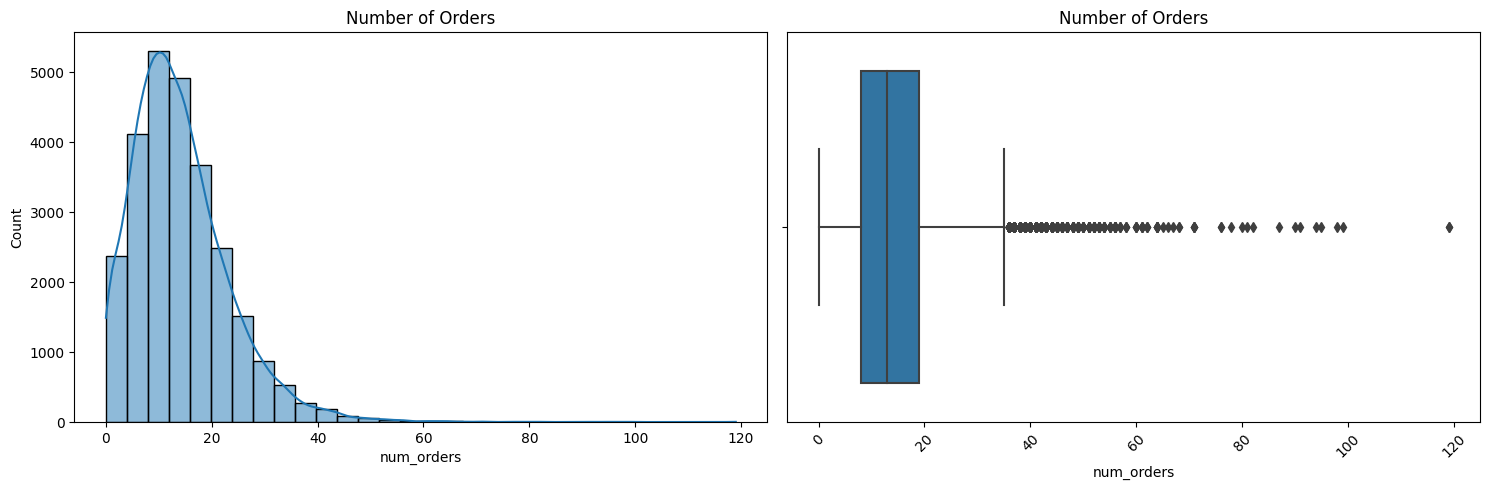

In [6]:
plot_hist_bar(df, 'Number of Orders', 'num_orders')

In [7]:
data = pd.read_csv('/datasets/taxi.csv',  index_col=[0], parse_dates=[0])

<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
If you see you want to read the data differently, you can change the way you read it above instead of reading it again.    
</div>

In [8]:
# Check if dates are in chronological order

data = data.sort_index()
print(data.index.is_monotonic)

True


The data is in chronological order.

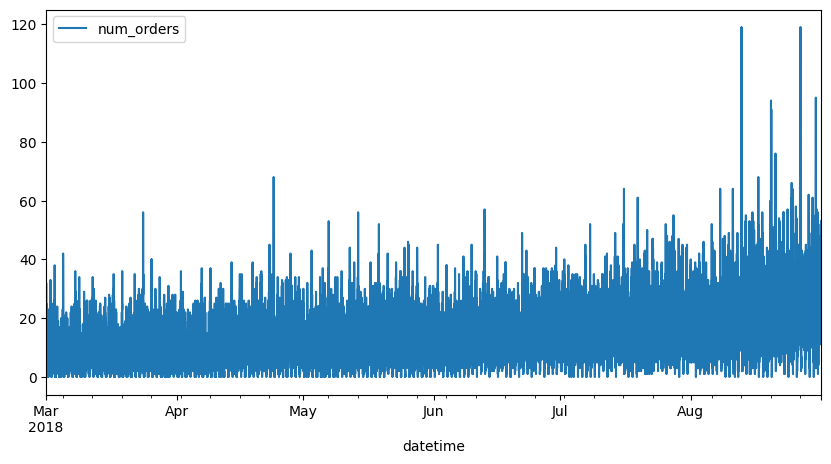

In [9]:
def plot_data(data):
    data.plot(figsize=(10, 5))
    plt.show()

plot_data(data)

There appears to be an increasing trend from March through August, however the chart is very busy. Different samples will be explored for further information.


Number of Orders


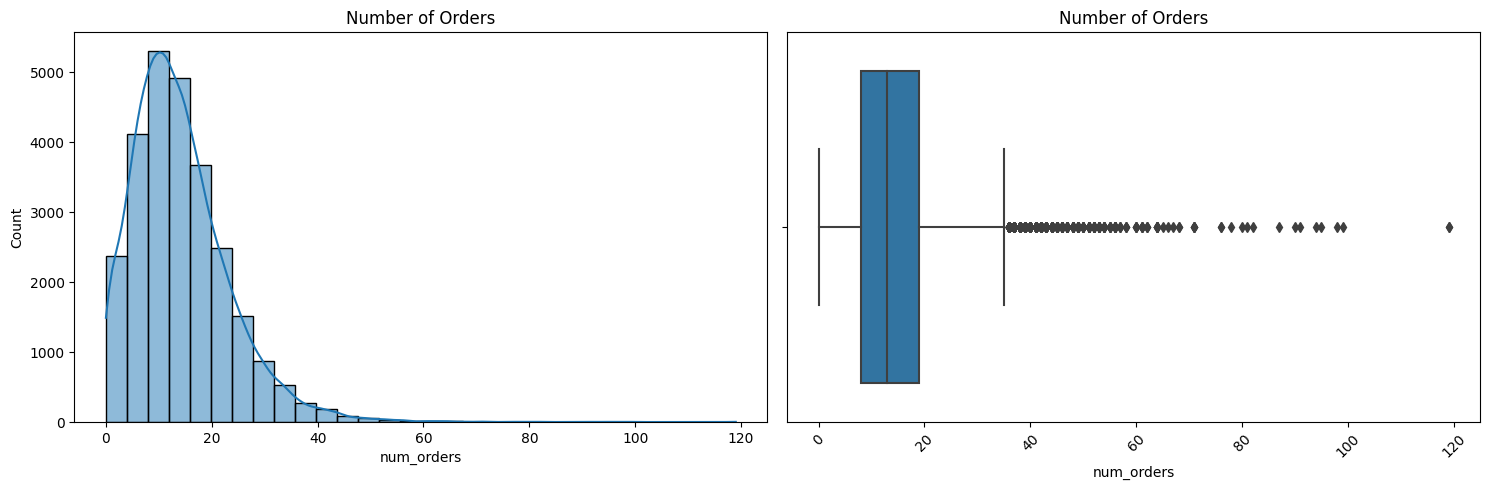

In [10]:
plot_hist_bar(data, 'Number of Orders', 'num_orders')

### Resample data by one hour

In [11]:
# resample data by one hour

data.sort_index(inplace=True)
data = data.resample('1H').sum()


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
The resampling is correct! We indeed need to use `sum`, not `mean`, since we need to forecast the total number of rides. 
    
</div>

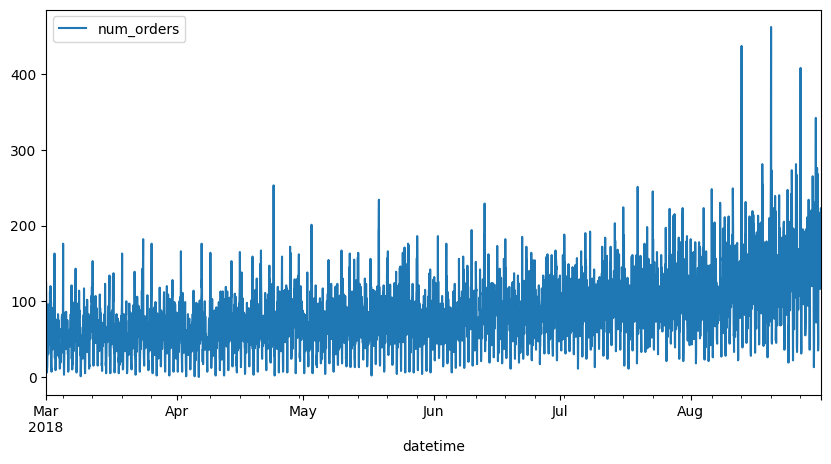

In [12]:
plot_data(data)

An increasing trend from March through August is more visible but the chart is still very busy. 
Resampling by one day:

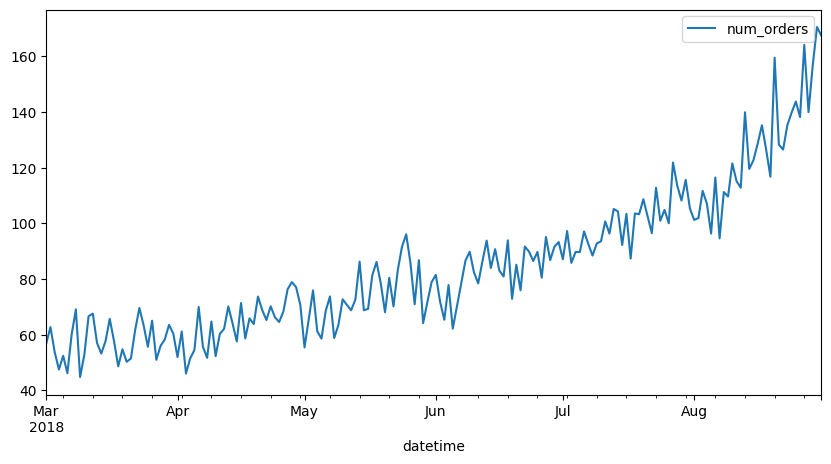

In [13]:
plot_data(data.resample('1D').mean())


Number of Orders


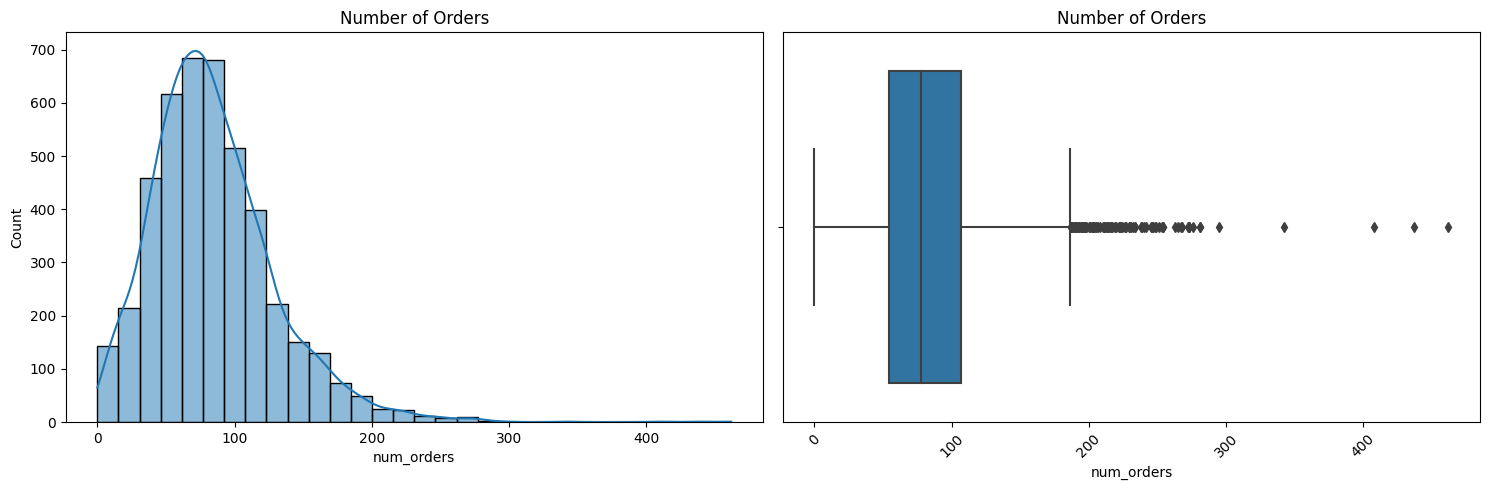

In [14]:
plot_hist_bar(data, 'Number of Orders', 'num_orders')

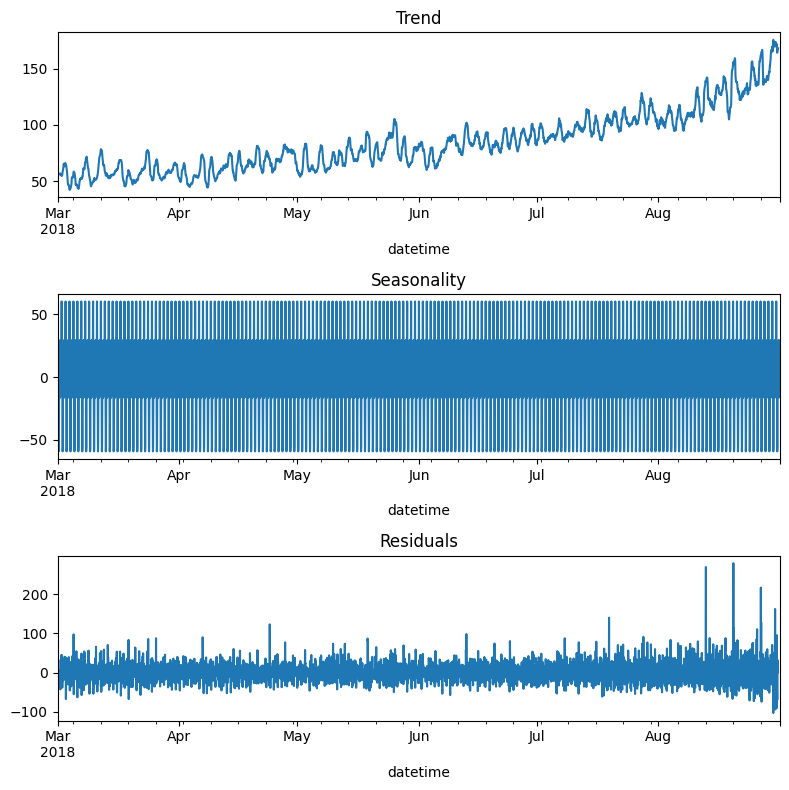

In [15]:

decomposed = seasonal_decompose(data)

plt.figure(figsize=(8, 8))

plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')

# plt.subplot(x,y,z) says that the images make a table
# of x rows and y columns.
# z is the place of the current image.

# plt.subplot(311) says 3 rows, 1 column, first image. 

plt.tight_layout()    # this helps fit subplots into the area


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
`seasonal_decompose` is a great method, well done! 
    
</div>

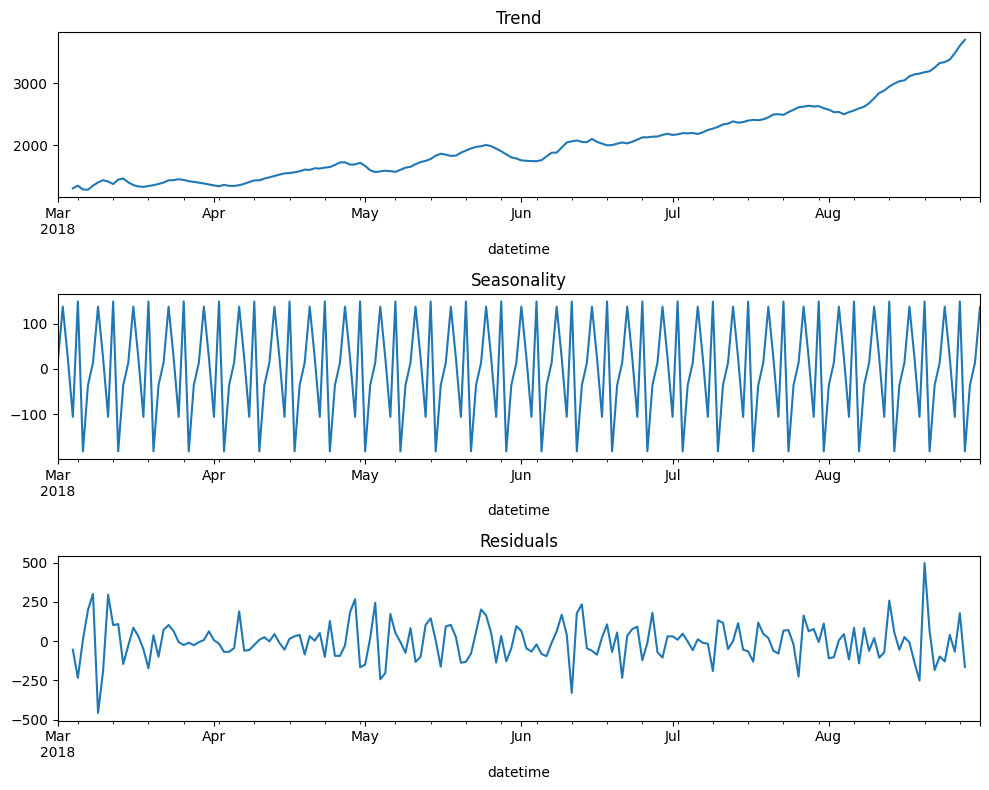

In [16]:
data_1d = data['2018-03':'2018-08'].resample('1D').sum()
decomposed = seasonal_decompose(data_1d)

plt.figure(figsize=(10, 8))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout();

Sampling one month:

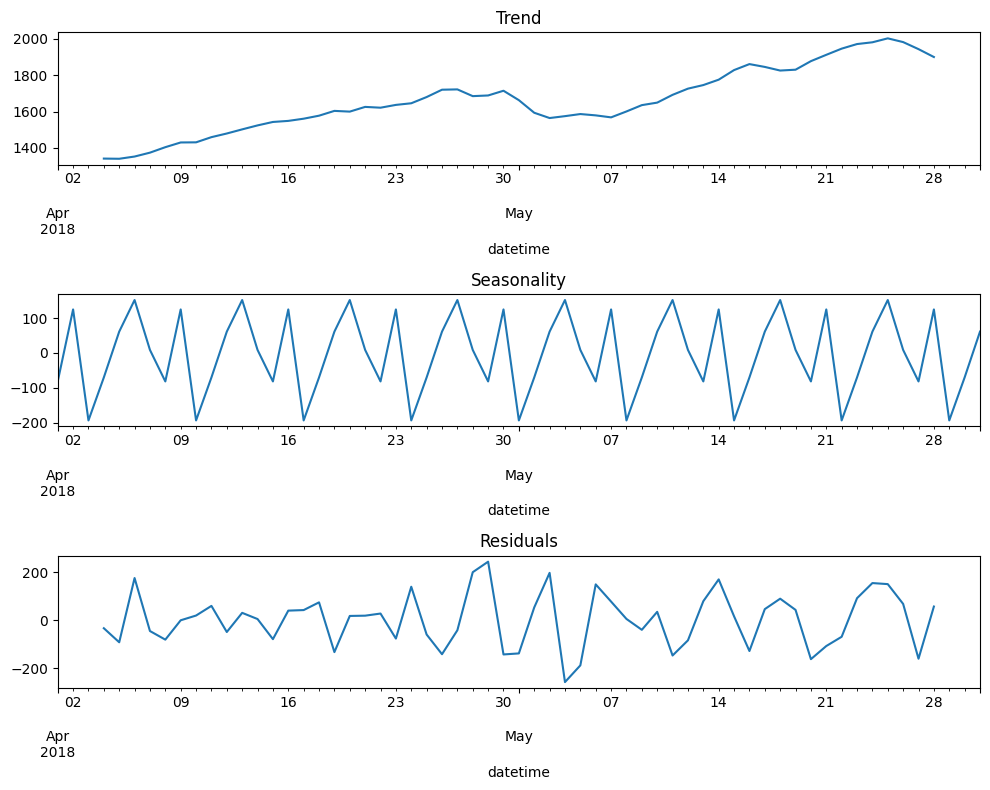

In [17]:
data_1m = data['2018-04':'2018-05'].resample('1D').sum()
decomposed = seasonal_decompose(data_1m)

plt.figure(figsize=(10, 8))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout();

Resampling by one hour over a one week period:

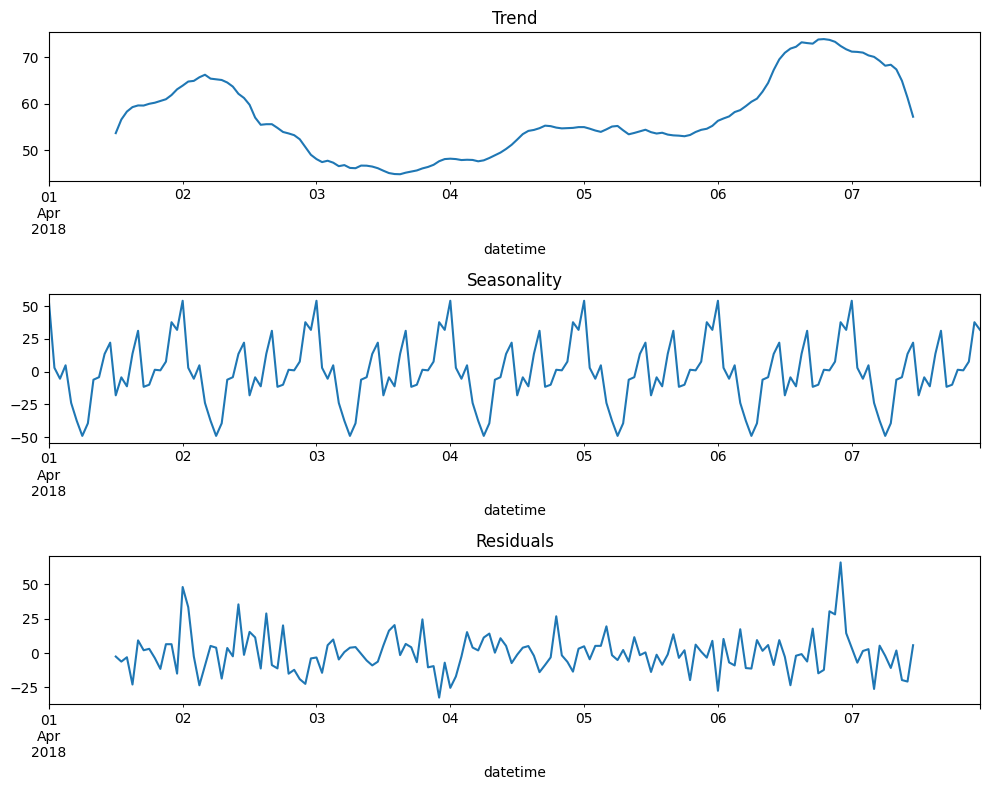

In [18]:
data_1h = data['2018-04-01':'2018-04-07'].resample('1H').sum()
decomposed = seasonal_decompose(data_1h)

plt.figure(figsize=(10, 8))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout();

After resampling by different periods the following are visible:
- The trend clearly shows an increase in the number of orders from March through August. 
- There is also seasonality present over a week period
- There is seasonality present throughout a day


<AxesSubplot:xlabel='datetime'>

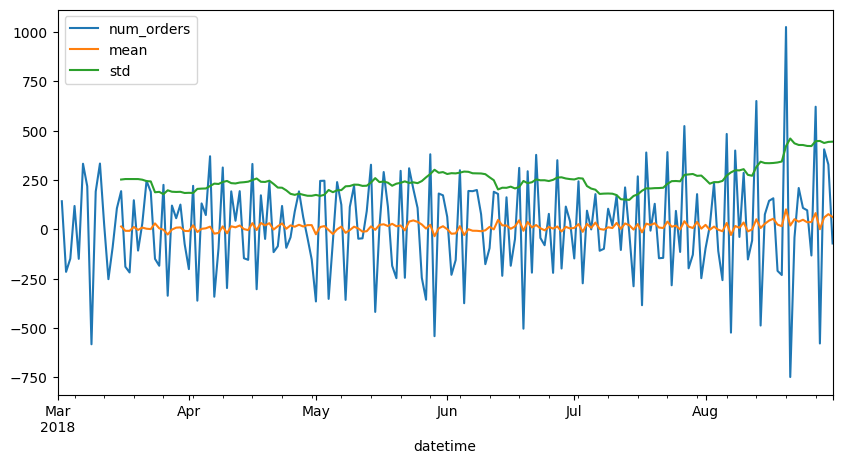

In [19]:
data_1d -= data_1d.shift()
data_1d['mean'] = data_1d['num_orders'].rolling(15).mean()
data_1d['std'] = data_1d['num_orders'].rolling(15).std()

data_1d.plot(figsize=(10, 5))


In [20]:
# adding new features

##### CONSIDER ADDING HOLIDAYS - The location is unknown

def make_features(data, max_lag=25, rolling_mean_size=6):

    #max_lag = 3
    #rolling_mean_size = 7

    #data['year'] = data.index.year # all dates are from the same year    
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek    
    data['hour'] = data.index.hour
    data['is_weekday'] = (data.index.dayofweek < 5).astype(int)     # create weekday indicator

    # lag features
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = (data['num_orders'].shift().rolling(rolling_mean_size).mean())

    return data

data = make_features(data)


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
    
Correct. Sometimes we can notice autocorrelation in time series. It means that the current value of the series depends on the previous values. Including so-called lag components allows machine learning models, such as linear regression, to take this dependency into account.


It is also good that you shift the data when introducing the rolling mean to avoid data leakage.

</div>

Conclusion:
- The dataset has been read.
- No issues were identified in the initial exploration.
- The data has been resampled by one hour
- New features have been created for:
  - Month
  - Day
  - Hour
  - Day of week
  - Weekday/Weekend
  - Lag
  - Rolling mean
- There is an increasing trend in the number of orders from March through August.
- There is seasonality present throughout a week
- There is seasonality present throughout a day
- There are outliers present in the data. These may be explained by holidays, events, or weather. Features will be introduced below.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Great! 
    
There's a visible trend by months. However, in the future, also check data from other years if the data is available. The sample size here is too small, so we can't draw conclusions on large timeframes. In this case, the increase in orders might simply be due to the business growth: more clients -> more orders.


We may have an intraday seasonality, which makes sense in such a dataset.    
</div>

<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
    
What can be inferred from the charts? Is there any trend or seasonality? What about orders distribution? 
    
 

    
</div>


<div style="border: 5px solid blue; padding: 10px; margin: 5px">
Additional charts have been added to show more trends, explore weekly and hourly seasonality.
</div>

## Analysis

In [21]:
explore_df(data)


                     num_orders  month  day  dayofweek  hour  is_weekday  \
datetime                                                                   
2018-03-01 00:00:00         124      3    1          3     0           1   
2018-03-01 01:00:00          85      3    1          3     1           1   
2018-03-01 02:00:00          71      3    1          3     2           1   
2018-03-01 03:00:00          66      3    1          3     3           1   
2018-03-01 04:00:00          43      3    1          3     4           1   

                     lag_1  lag_2  lag_3  lag_4  ...  lag_17  lag_18  lag_19  \
datetime                                         ...                           
2018-03-01 00:00:00    NaN    NaN    NaN    NaN  ...     NaN     NaN     NaN   
2018-03-01 01:00:00  124.0    NaN    NaN    NaN  ...     NaN     NaN     NaN   
2018-03-01 02:00:00   85.0  124.0    NaN    NaN  ...     NaN     NaN     NaN   
2018-03-01 03:00:00   71.0   85.0  124.0    NaN  ...     NaN     N

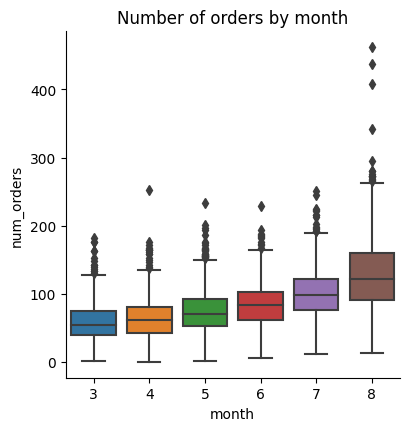

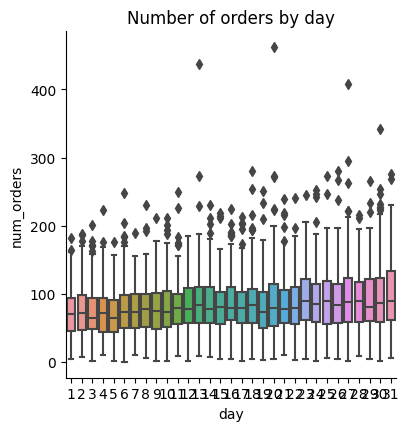

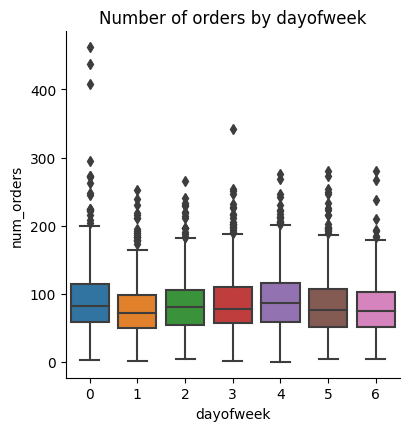

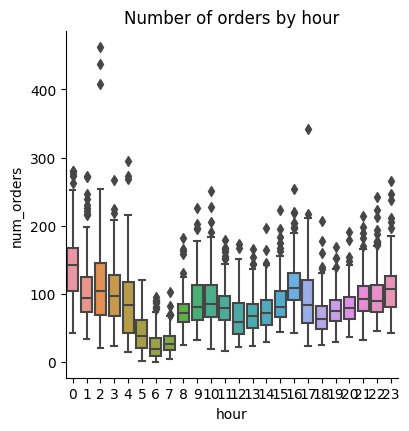

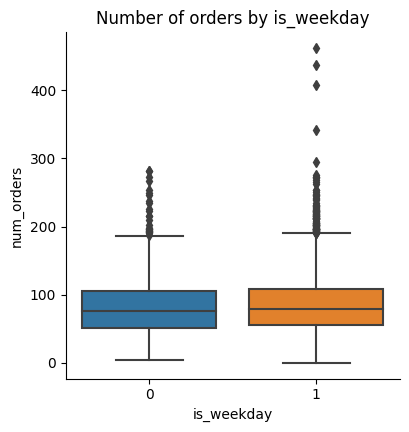

In [22]:
def get_catplot(data, xcol, ycol= 'num_orders'):
    title = 'Number of orders by ' + xcol
    sns.catplot(x=xcol, y=ycol, kind="box", data=data, height = 4)
    plt.title(title)
    plt.show()

##### HIDDEN TO SAVE SPACE #####

col_list = ['month', 'day', 'dayofweek', 'hour', 'is_weekday']

for columns in col_list:
    get_catplot(data, columns)

Month: 3


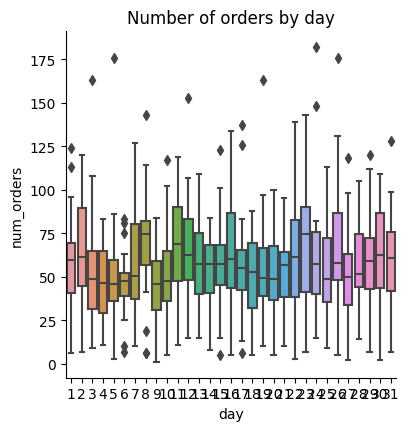

Month: 4


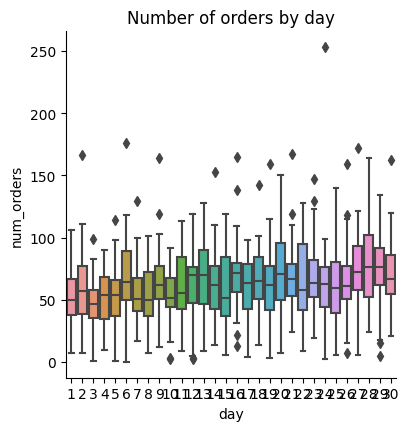

Month: 5


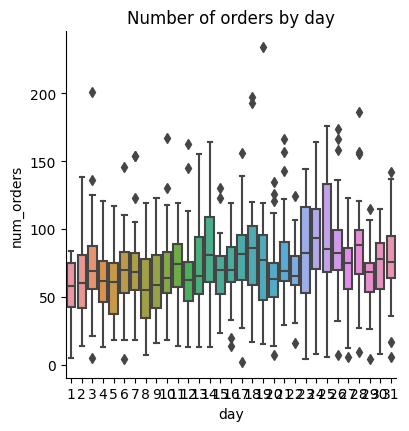

Month: 6


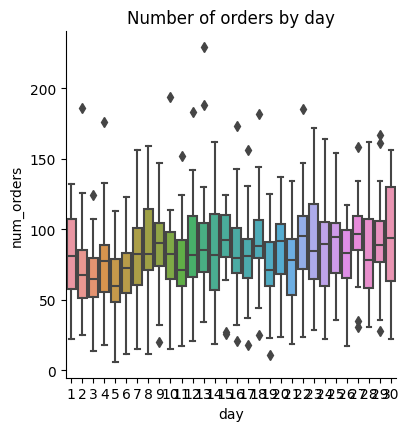

Month: 7


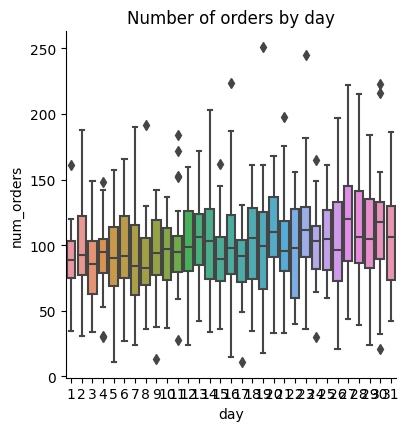

In [23]:
# iterate through each month and plot orders by day
##### HIDDEN TO SAVE SPACE #####
for month_num in range(3,8):
    print(f'Month: {month_num}')
    get_catplot(data[data['month']==month_num], 'day')

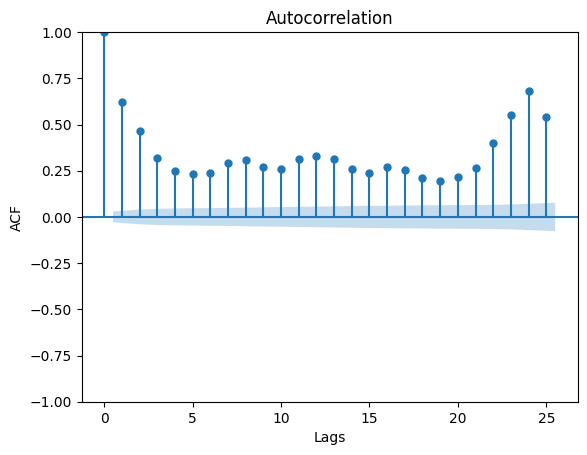

In [24]:
def get_acf(data, num_lags=25):
    target='num_orders'
    acf = plot_acf(x=data[target], lags=num_lags)
    
    plt.xlabel("Lags")
    plt.ylabel("ACF")
    plt.show()

get_acf(data)

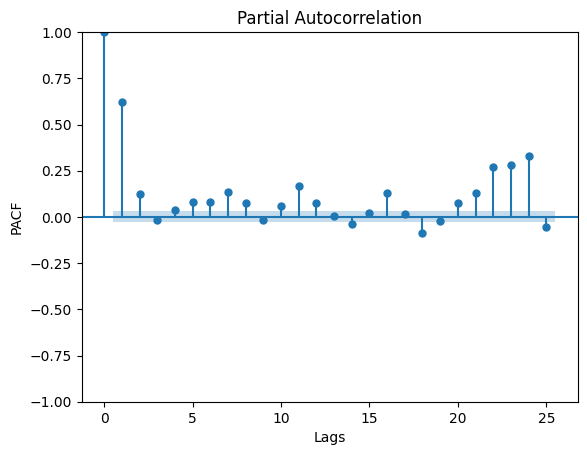

In [25]:
# plot PACF

def get_pacf(data, num_lags=25):
    target='num_orders'
    pacf = plot_pacf(x=data[target], lags=num_lags)  
    
    plt.xlabel("Lags")
    plt.ylabel("PACF")
    plt.show()

get_pacf(data)

There are outliers present in the data. These may be caused by unknown features, like weather conditions or holidays.
Outliers have not been removed.

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>


The partial autocorrelation function plot also shows significant autocorrelation values at lags 1 - 2 and 22-24. This indicates that a model with these lags might be more appropriate.

</div>

## Training

Train different models with different hyperparameters.
The test sample should be 10% of the initial dataset.

In [26]:
# Create a results dataframe
# This is used to track and compare results

results_df = pd.DataFrame(columns=['Model', 'RMSE'])

In [27]:
# split the data with 10% for the test set

target='num_orders'

train, test = train_test_split(data, shuffle=False, test_size=0.10)
train = train.dropna()

features_train = train.drop([target], axis=1)
target_train = train[target]
features_test = test.drop([target], axis=1)
target_test = test[target]

#numeric=['month','day', 'dayofweek', 'hour', 'is_weekday', 'lag_1', 'lag_2', 'lag_3', 'rolling_mean'] 
   
#scaler = StandardScaler()
#scaler.fit(features_train[numeric])

#features_train[numeric] = scaler.transform(features_train[numeric])
#features_valid[numeric] = scaler.transform(features_valid[numeric])
#features_test[numeric] = scaler.transform(features_test[numeric])

scaler = MinMaxScaler()
features_train_scaled = pd.DataFrame(scaler.fit_transform(features_train))
features_test_scaled =pd.DataFrame(scaler.transform(features_test))

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Correct. Working with time series, we should not shuffle the data. 
    
</div>

In [28]:
# confirming data was split properly

print(train.index.min(), train.index.max())
print(test.index.min(), test.index.max())


2018-03-02 01:00:00 2018-08-13 13:00:00
2018-08-13 14:00:00 2018-08-31 23:00:00


In [29]:
# Prediction using a constant

pred_median = np.ones(target_train.shape) * train['num_orders'].median()
print('Median number of orders:', train['num_orders'].median())

rmse_score = mean_squared_error(target_train, pred_median, squared=False)
print(f"RMSE for the train set: {rmse_score:.2f}")

# Add to results
new_row = pd.DataFrame([{
    'Model': 'constant',
    'RMSE': rmse_score
}])
results_df = pd.concat([results_df, new_row], ignore_index=True)


Median number of orders: 75.0
RMSE for the train set: 38.84


In [30]:
# Prediction using the previous value:

print('Median number of orders per hour:', train['num_orders'].median())
pred_previous = target_train.shift()
pred_previous.iloc[0] = target_train.iloc[-1]

rmse_score = mean_squared_error(target_train, pred_previous, squared=False)
print(f"RMSE for the train set: {rmse_score:.2f}")

# Add to results
new_row = pd.DataFrame([{
    'Model': 'previous value',
    'RMSE': rmse_score
}])
results_df = pd.concat([results_df, new_row], ignore_index=True)

Median number of orders per hour: 75.0
RMSE for the train set: 36.18


In [31]:
# linear regression

def get_linear_regression(features_train,target_train):
    model = LinearRegression()
    model.fit(features_train,target_train) 
    predictions_train = model.predict(features_train)
    
    #print("MAE for the training set:", mean_absolute_error(target_train, predictions_train))

    rmse = mean_squared_error(target_train, predictions_train, squared=False)
    print(f"RMSE for the test set: {rmse:.2f}")

    return rmse

rmse_score = get_linear_regression(features_train_scaled,target_train)

# Add to results
new_row = pd.DataFrame([{
    'Model': 'linear regression',
    'RMSE': rmse_score
}])
results_df = pd.concat([results_df, new_row], ignore_index=True)

RMSE for the test set: 25.65


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Linear Regression is a good start, well done! 
    
</div>

In [32]:
def get_randomforest_grid(features_train, target_train):
    # Sample data for faster grid search
    sample_size = min(50000, features_train.shape[0])
    np.random.seed(42)
    sample_indices = np.random.choice(features_train.shape[0], sample_size, replace=False)
    
    # Use .iloc for row indexing
    features_sample = features_train.iloc[sample_indices]
    target_sample = target_train.iloc[sample_indices]
 
    # Expanded parameter distributions for RandomizedSearchCV
    param_distributions = {
        'n_estimators': [5, 10, 15, 20, 25, 30],
        'max_depth': [5, 10, 15, 20, 25, None],
        'min_samples_split': [2, 5, 10, 15],
        'min_samples_leaf': [1, 2, 4, 8]
    }

    model = RandomForestRegressor(
        random_state=42,
        n_jobs=-1
    )

    # Create TimeSeriesSplit cross-validator
    tscv = TimeSeriesSplit(n_splits=3)  # 3 splits for time series validation
    
    # Use TimeSeriesSplit in RandomizedSearchCV
    random_search = RandomizedSearchCV(
        estimator=model, 
        param_distributions=param_distributions, 
        n_iter=12,
        cv=tscv,  # Use TimeSeriesSplit instead of cv=2
        scoring='neg_mean_squared_error',
        random_state=42,
        n_jobs=-1
    )

    random_search.fit(features_sample, target_sample)
    
    best_params = random_search.best_params_
    print(f"Best Parameters: {best_params}")
    
    best_model = random_search.best_estimator_
    predictions_train = best_model.predict(features_train)
    
    best_result = mean_squared_error(target_train, predictions_train, squared=False)
    print(f"RMSE: {best_result:.2f}")

    return best_result, best_model
    
rmse_score, best_model = get_randomforest_grid(features_train_scaled, target_train)

# Add to results
new_row = pd.DataFrame([{
    'Model': 'random forest',
    'RMSE': rmse_score
}])
results_df = pd.concat([results_df, new_row], ignore_index=True)

Best Parameters: {'n_estimators': 25, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 25}
RMSE: 11.97


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Correct!   
</div>

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
It's great that you implemented hyperparameters tuning, well done! 
    
</div>
<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
When we work with time series, we have to remember about the correct order in the data. To ensure that the training data always precedes the test data in time, we have to employ the `TimeSeriesSplit` class, a cross-validator for time series. Just use it as `cv` parameter value. 
    
    
Take a look at this articles: 
    
    
    
- [Understanding TimeSeriesSplit Cross-Validation for Time Series Data](https://koshurai.medium.com/understanding-timeseriessplit-cross-validation-for-time-series-data-4c232cc4f844).
    

    
- [TimeSeriesSplit: how to use it](https://www.kaggle.com/code/tomwarrens/timeseriessplit-how-to-use-it).
    
    
    
- [Time Series Splitting Techniques: Ensuring Accurate Model Validation](https://medium.com/@mouadenna/time-series-splitting-techniques-ensuring-accurate-model-validation-5a3146db3088).

</div>

<div style="border: 5px solid blue; padding: 10px; margin: 5px">
Thank you, TimeSeriesSplit has been implemented.
</div>

In [33]:
import catboost as cb

#Catboost Regressor

def get_catboost(features_train, target_train):
    cb_model = cb.CatBoostRegressor(max_depth=4, iterations=150, loss_function="RMSE", verbose=10)
    cb_model.fit(features_train, target_train)
    # Use features_test_scaled instead of features_test
    cb_y_val_test = cb_model.predict(features_test_scaled)
    cb_test_RMSE = (mean_squared_error(target_test, cb_y_val_test))**0.5
    print('The RMSE for Catboost Regressor is:', round(cb_test_RMSE, 2))

    return cb_test_RMSE

rmse_score = get_catboost(features_train_scaled, target_train)

# Add to results
new_row = pd.DataFrame([{
    'Model': 'catboost',
    'RMSE': rmse_score
}])
results_df = pd.concat([results_df, new_row], ignore_index=True)

Learning rate set to 0.237828
0:	learn: 34.5450284	total: 47.1ms	remaining: 7.02s
10:	learn: 24.7575835	total: 58.2ms	remaining: 736ms
20:	learn: 23.3702378	total: 69ms	remaining: 424ms
30:	learn: 22.3759584	total: 80.1ms	remaining: 308ms
40:	learn: 21.6912964	total: 91ms	remaining: 242ms
50:	learn: 20.7589767	total: 102ms	remaining: 198ms
60:	learn: 20.1247598	total: 113ms	remaining: 165ms
70:	learn: 19.4995174	total: 124ms	remaining: 138ms
80:	learn: 19.0901253	total: 137ms	remaining: 117ms
90:	learn: 18.5816966	total: 148ms	remaining: 96.2ms
100:	learn: 18.1161233	total: 160ms	remaining: 77.4ms
110:	learn: 17.7403301	total: 171ms	remaining: 60ms
120:	learn: 17.4496755	total: 182ms	remaining: 43.5ms
130:	learn: 17.1027314	total: 193ms	remaining: 27.9ms
140:	learn: 16.7999344	total: 204ms	remaining: 13ms
149:	learn: 16.5230051	total: 215ms	remaining: 0us
The RMSE for Catboost Regressor is: 40.99


In [34]:
print(results_df)

               Model       RMSE
0           constant  38.838055
1     previous value  36.182019
2  linear regression  25.648182
3      random forest  11.973264
4           catboost  40.990386


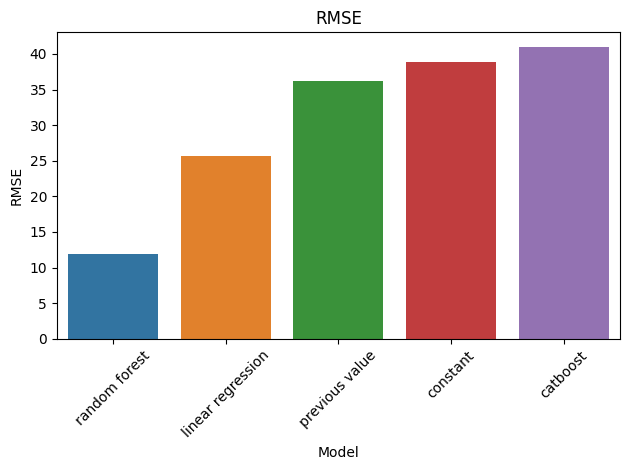

In [35]:
def get_barplot(df, colx, coly, title, ascending=True):
    
    df_sorted = df.sort_values(by='RMSE', ascending=True)
        
    sns.barplot( x=colx, y=coly, data=df_sorted)
    plt.title(title)
    plt.xticks(rotation=45)

get_barplot(results_df, 'Model', 'RMSE', 'RMSE')
plt.tight_layout()  # Prevents labels from being cut off
plt.show()

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    

    
It's great that you visualize the results! 
    
</div>

Predictions have been made using:
- a constant
- the previous value
- linear regression
- random forest
- catboost

All models outperformed the constant and previous values, confirming viability.

The lowest RMSE achieved was with random forest.

# Test the data using the test sample and provide a conclusion.

In [36]:
model = best_model
predictions_test = model.predict(features_test_scaled)
result = mean_squared_error(target_test, predictions_test, squared=False)

#features_train_scaled

print(f'RMSE of the test set: {result:.2f}')

RMSE of the test set: 43.58


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    

    
Good result.     
</div>
<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    

    
Please note that some RMSE were calculated on the test subset, and here you also use test subset. So you use the same data to evaluate and choose the model and then test it.     
</div>

<div style="border: 5px solid blue; padding: 10px; margin: 5px">
Thank you, all initial evaluations should be conducted on the training set.
</div>

Using the model that achived the best RMSE score in training, an RMSE score of 43.6 was achieved on the test set.

This achieves the target of an RMSE score less than or equal to 48.

Conclusion

- The dataset has been read.
- No issues were identified in the initial exploration.
- The data was provided chronological order.
- The data has been resampled by one hour
- There is an increasing trend present in the number of orders from March through August
- Weekly seasonality is present
- Hourly seasonality is present
- New features have been created for:
- - Month
- - Day
- - Hour
- - Day of week
- - Weekday/Weekend
- - Lag
- - Rolling mean

There are outliers present in the data. These may be caused by unknown features, like weather conditions or holidays.
Outliers have not been removed.

Predictions have been made using:
- a constant
- the previous value
- linear regression
- random forest
- catboost

All models outperformed the constant and previous values, confirming viability.

The lowest RMSE achieved, 12, was with random forest.

Using the model that achived the best RMSE score in training, an RMSE score of 44 was achieved on the test set.

This achieves the target of an RMSE score less than or equal to 48.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Excellent!    
</div>

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>

    
The conclusion is written well.    
</div>    
 
<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Don't forget to update it. 

</div>

# Review checklist

- [x]  Jupyter Notebook is open
- [x]  The code is error-free
- [x]  The cells with the code have been arranged in order of execution
- [x]  The data has been downloaded and prepared
- [x]  The data has been analyzed
- [x]  The model has been trained and hyperparameters have been selected
- [x]  The models have been evaluated. Conclusion has been provided
- [x] *RMSE* for the test set is not more than 48